In [1]:
import keras
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# load_data returns a tupple containing the tringing data in 0 and test data in 1
(X_train_full, y_train_full), (X_test, y_test) = trainfashion_mnist = fashion_mnist.load_data()

In [3]:
# number of images, height, width
# These pictures are represented as an array of values 0-255. If it were pictures, 
# an extra dimension would be added to the end, showing the number of colour chanels
print(X_train_full.shape, X_train_full.dtype)
print(y_train_full.shape, y_train_full.dtype)

(60000, 28, 28) uint8
(60000,) uint8


In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
y_train_full.shape

(60000,)

In [6]:
y_test.shape

(10000,)

In [7]:
type(y_test[0])

numpy.uint8

In [8]:
type(X_train_full[0])

numpy.ndarray

In [9]:

X_train, X_val = X_train_full[5000:] / 255, X_train_full[:5000] / 255
y_train, y_val = y_train_full[5000:], y_train_full[:5000]

In [10]:
model = Sequential()

model.add(Flatten(input_shape=[28, 28]))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(10, activation='softmax'))

checkpoint = ModelCheckpoint('weights.hdf5', monitor='val_loss', save_best_only=True)
callbacks_list = [checkpoint]
early_stop = EarlyStopping(patience=4)


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [12]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
trained_model = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val), callbacks=[early_stop, callbacks_list], verbose=False)

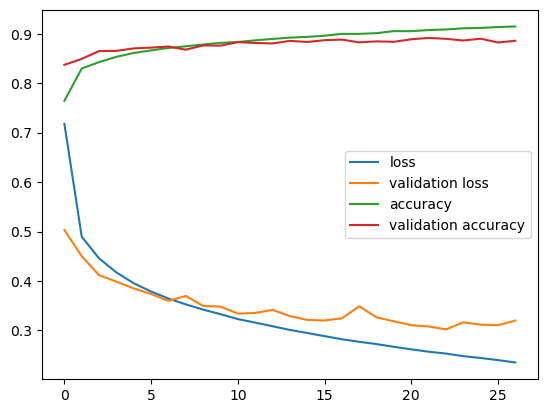

In [14]:
# Plot the loss and val_loss progression.
# To access the history-item, you need to create a new object that is the trained model.

plt.plot(trained_model.history['loss'], label='loss')
plt.plot(trained_model.history['val_loss'], label='validation loss')
plt.plot(trained_model.history['accuracy'], label='accuracy')
plt.plot(trained_model.history['val_accuracy'], label='validation accuracy')
plt.legend()
plt.show()

In [28]:
model.layers

In [30]:
# ,odel.layers is a list of the layers in the model
dense2 = model.layers[2]

In [33]:
# Get weights for the layer
# Returns a list with 2 values
# 1: the array of weights in this layer
wght2 = dense2.get_weights()
len(wght2)

300

In [25]:
# Load the weights from the trained_model into the original model
# The model is now loaded with the best weights from the trained_model, without having to be trained again. You basically now have two identical models.
# Use the old model with the new weights to predict.
model.load_weights('weights.hdf5')
np.argmax(model.predict(X_test[:5]), axis=1)

1/1 [==============================] - 0s 23ms/step


array([9, 2, 1, 1, 6], dtype=int64)

In [26]:
# The first 5 labels were correctly predicted
y_test[:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [15]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_pred[0:5]

313/313 [==============================] - 1s 2ms/step


array([9, 2, 1, 1, 6], dtype=int64)

In [16]:
y_test[0:5]

array([9, 2, 1, 1, 6], dtype=uint8)

In [17]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 81.9309 - accuracy: 0.8298


[81.93090057373047, 0.829800009727478]

In [27]:
# Accuracy score shows the same result as evaluate()
acc = accuracy_score(y_pred=y_pred, y_true=y_test)
acc

0.8298